In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from os.path import join

import matplotlib.pyplot as plt
from matplotlib.pyplot import rc

output_path = './Figures'
data_path  = './processed'

sns.set_theme(style="white", font_scale=1.2,palette='viridis')
font = {'weight' : 'bold', 'family':'Nimbus Sans'}
rc('font', **font) 

In [5]:
# Input parameters
BE = 'ABE'
library = 'nSpG'
thrd = 0.05

# Load data
df = pd.read_csv(join(data_path, f'{library}_{BE}_cell_line_padj.csv'))

# Define labels and dictionary
label = ['SYN', 'MIS', 'ETY', 'Neutral', 'Control', 'iSilence']
dict_label = {
    'SYN': 'Synonymous',
    'MIS': 'Missense',
    'ETY': 'No-Edit',
    'Neutral': 'Non-Essential',
    'Control': 'Control',
    'iSilence': 'iSilence'
}

# Iterate through each category
for categ in label:
    df_ = df[df['categ'] == categ]
    
    # Calculate hit rate
    total_points = len(df_)
    significant_points = df_['significant'].sum()
    hit_rate = round((significant_points / total_points) * 100, 2) if total_points > 0 else 0
    
    # Create jointplot
    g = sns.jointplot(
        data=df_, x='log2FoldChange_K562', y='log2FoldChange_Jurkat',
        xlim=(-6, 4), ylim=(-6, 4), hue='significant', alpha=0.6,
        palette={True: 'red', False: 'grey'}, color="m", s = 500
    )
    
    # Add diagonal line
    g.ax_joint.plot([-6, 4], [-6, 4], color='red', linestyle='--', linewidth=1)
    
    # Adjust marker size
    for collection in g.ax_joint.collections:
        collection.set_sizes([80])  # Increased marker size
    
    # Customize legend
    handles, _ = g.ax_joint.get_legend_handles_labels()
    g.ax_joint.legend(
        handles, ['False', 'True'], loc='upper left',
        title="Adjusted P-value < 0.05"
    )
    
    # Add annotation for hit rate
    g.ax_joint.text(
        0, -5,  # Position of the annotation
        f"Hit Rate: {hit_rate}%\n({significant_points}/{total_points})",
        fontsize=16, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white")
    )
    
    # Customize axis labels and title
    g.ax_joint.set_xlabel('')
    g.ax_joint.set_ylabel('')
    
    # Save the plot
    plt.savefig(
        join('Figures','cell_L2FC', f'{categ}_{BE}_{library}.png'),
        transparent=True, bbox_inches='tight'
    )
    plt.close()

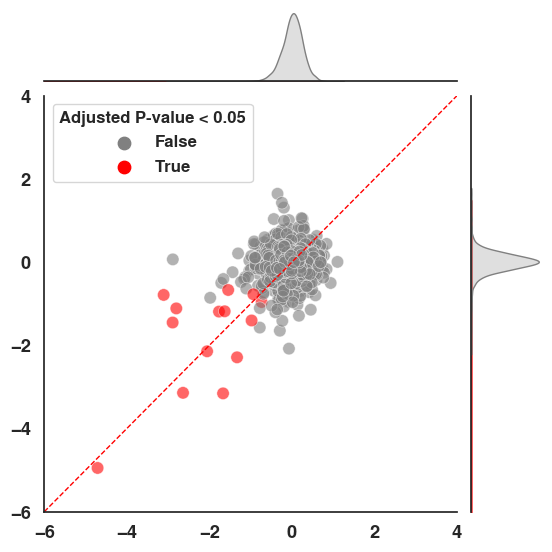

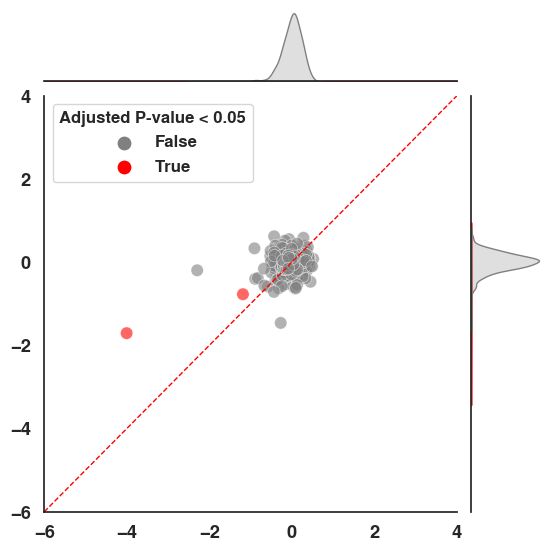

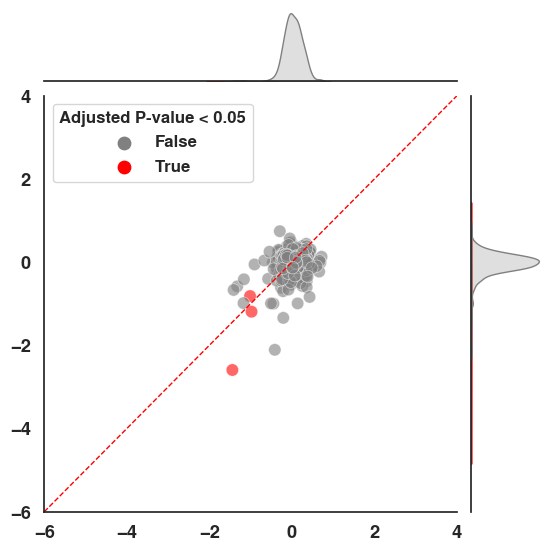

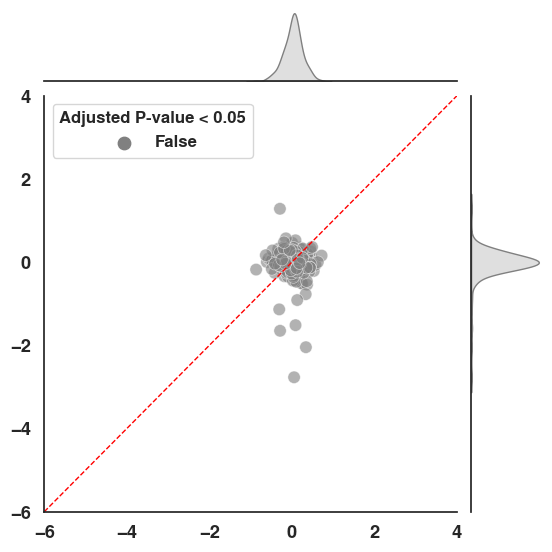

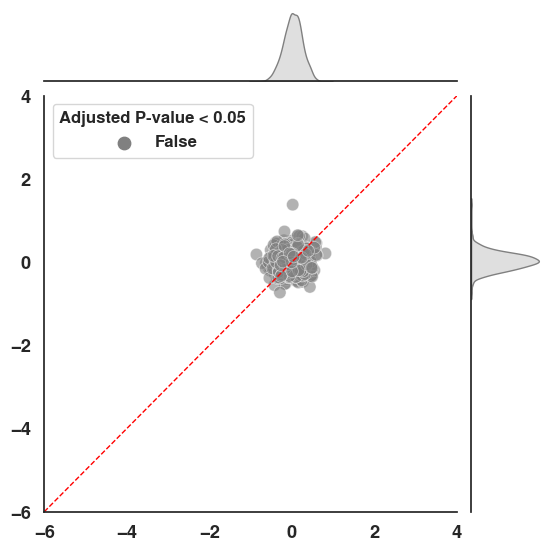

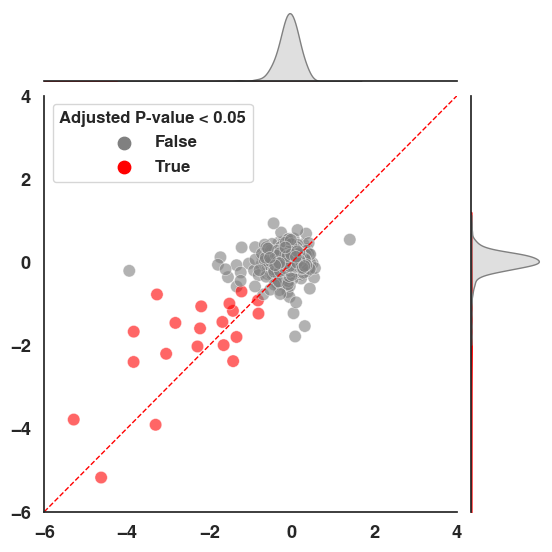

In [95]:
BE = 'CBE'
library = 'nSpG'
thrd = 0.05

df = pd.read_csv(join(data_path, f'{library}_{BE}_cell_line_padj.csv'))

label = ['SYN', 'MIS','ETY', 'Neutral', 'Control', 'iSilence']
dict_label = {'SYN':'Synonymous','MIS':'Missense', 'ETY':'No-Edit',
             'Neutral':'Non-Essential', 'Control':'Control', 'iSilence':'iSilence'}
for categ in label:
    df_ = df[df['categ'] == categ]
    g = sns.jointplot(data = df_, x = 'log2FoldChange_K562', y = 'log2FoldChange_Jurkat',
                      xlim=(-6,4), ylim=(-6,4),hue = 'significant',alpha = 0.6,palette={True: 'red', False: 'grey'},
                      color="m")
    g.ax_joint.plot([-6, 4], [-6, 4], color='red', linestyle='--', linewidth=1)
    # Adjust marker size
    for collection in g.ax_joint.collections:
        collection.set_sizes([80])  # Increased marker size
    # Customize legend
    handles, _ = g.ax_joint.get_legend_handles_labels()
    g.ax_joint.legend(handles, ['False', 'True'], loc='upper left', title="Adjusted P-value < 0.05",
                     fontsize=12, title_fontsize=12)
    
    # Remove axis labels
    g.ax_joint.set_xlabel('')
    g.ax_joint.set_ylabel('')
    # g.ax_joint.set_title('iSilence', fontsize=14, fontweight='bold', y = 1.02)
    # g.fig.suptitle(dict_label[categ], fontsize=14, fontweight='bold', x = 0.5,y=1.01)
    plt.savefig(join('Figures', f'{categ}_{BE}_{library}.png'), transparent = True,bbox_inches='tight')

In [3]:
df_ABE = pd.read_csv(join(data_path,'nSpG_ABE_hitn.csv'), index_col = 0)


In [4]:
df_CBE = pd.read_csv(join(data_path,'nSpG_CBE_hitn.csv'), index_col = 0)


In [5]:
df_hitn = pd.concat([df_ABE,df_CBE])


In [6]:
df_hitn

,categ,tot_n,sig_n,hit_perc,BE,library
0,SYN,2099,5,0.238209,ABE,ABE
1,MIS,231,9,3.896104,ABE,ABE
2,Neutral,194,1,0.515464,ABE,ABE
3,ETY,400,0,0.000000,ABE,ABE
4,iSilence,646,179,27.708978,ABE,ABE
5,Control,737,14,1.899593,ABE,ABE
6,SYN,2099,11,0.524059,ABE,nSpG
7,MIS,231,1,0.432900,ABE,nSpG
8,Neutral,194,0,0.000000,ABE,nSpG
9,ETY,400,1,0.250000,ABE,nSpG


In [72]:
label = ['SYN', 'MIS','ETY','iSilence']

df_diff = pd.DataFrame(index = label, columns = ['ABE','CBE'] )
for categ in label:
    Library = ['ABE', 'CBE']
    Editor = ['Base Editor', 'Ghost Editor']
    df_ = df_hitn[df_hitn['categ'] == categ].reset_index()
    data = {
        'Library': Library,
        'Base Editor': [df_.loc[0,'hit_perc'],df_.loc[2,'hit_perc']],
        'Ghost Editor': [df_.loc[1,'hit_perc'], df_.loc[3,'hit_perc']]
    }
    diff_ABE = data['Ghost Editor'][0]-data['Base Editor'][0]
    diff_CBE = data['Ghost Editor'][1]-data['Base Editor'][1]

    df_diff.loc[categ,'ABE'] = float(diff_ABE)
    df_diff.loc[categ,'CBE'] = float(diff_CBE)
    

In [73]:
df_diff = df_diff.apply(pd.to_numeric, errors='coerce')

/storage/group/epo2/default/yur97/conda_envs/synSg/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


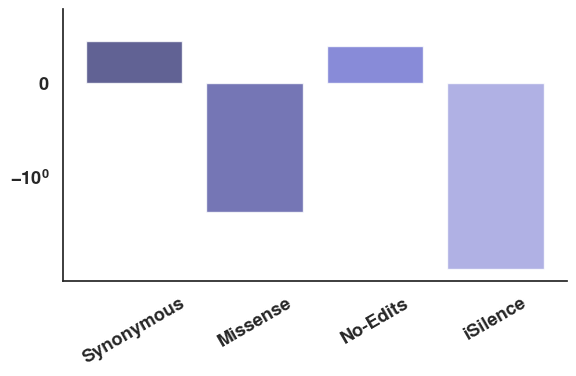

In [77]:
# Define colors
cmap = plt.colormaps["tab20b"]
colors = cmap([0, 1, 2, 3])

# Plot with symlog
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(df_diff.index, df_diff['ABE'], color=colors, alpha=0.8)

# Set symlog scale
ax.set_yscale('symlog', linthresh=0.5, base = 10)
# ax.set_ylabel('Symmetric Logarithmetic Difference\nGhost v.s. Base Editor (linear threshold = 0.5)', 
#               fontweight = 'bold',fontsize=12)
# ax.set_title('Barplot for ABE with Symmetric Log Scale', fontsize=14, fontweight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticklabels(['Synonymous','Missense', 'No-Edits', 'iSilence'],
                  rotation = 30)

ax.set_yticks([-1,0,0.5])

plt.tight_layout()
plt.savefig(join('Figures','bar', f'ABE_diff_bar.png'), transparent = True,bbox_inches='tight')
plt.show()

/storage/group/epo2/default/yur97/conda_envs/synSg/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


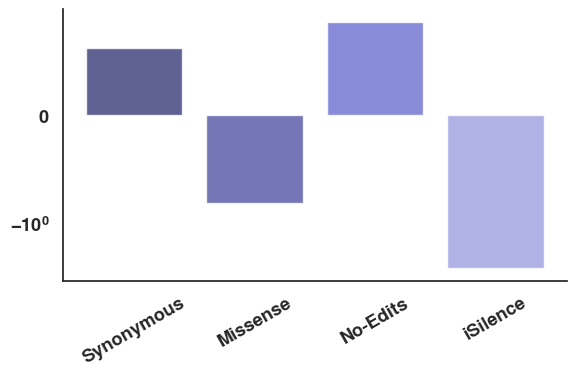

In [75]:
# Define colors
cmap = plt.colormaps["tab20b"]
colors = cmap([0, 1, 2, 3])

# Plot with symlog
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(df_diff.index, df_diff['CBE'], color=colors, alpha=0.8)

# Set symlog scale
ax.set_yscale('symlog', linthresh=0.5, base = 10)
# ax.set_ylabel('Symmetric Logarithmetic Difference\nGhost v.s. Base Editor (linear threshold = 0.5)', 
#               fontweight = 'bold',fontsize=12)
# ax.set_title('Barplot for ABE with Symmetric Log Scale', fontsize=14, fontweight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticklabels(['Synonymous','Missense', 'No-Edits', 'iSilence'],
                  rotation = 30)
ax.set_yticks([-1,0,0.5])

plt.tight_layout()
plt.savefig(join('Figures','bar', f'CBE_diff_bar.png'), transparent = True,bbox_inches='tight')
plt.show()

/storage/group/epo2/default/yur97/conda_envs/synSg/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


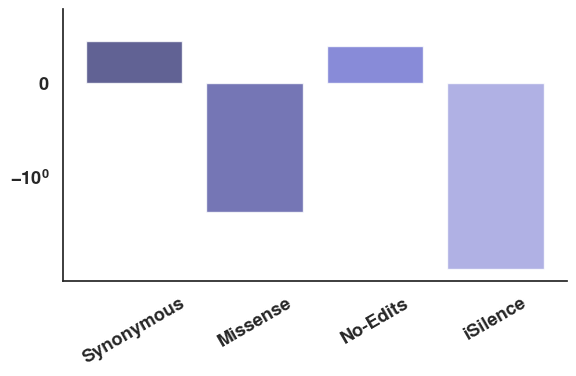

In [61]:
# Define colors
cmap = plt.colormaps["tab20b"]
colors = cmap([0, 1, 2, 3])

# Plot with symlog
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(df_diff.index, df_diff['ABE'], color=colors, alpha=0.8)

# Set symlog scale
ax.set_yscale('symlog', linthresh=0.5, base = 10)
# ax.set_ylabel('Symmetric Logarithmetic Difference\nGhost v.s. Base Editor (linear threshold = 0.5)', 
#               fontweight = 'bold',fontsize=12)
# ax.set_title('Barplot for ABE with Symmetric Log Scale', fontsize=14, fontweight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticklabels(['Synonymous','Missense', 'No-Edits', 'iSilence'],
                  rotation = 30)
ax.set_yticks([-1,0,0.5])

plt.tight_layout()
plt.savefig(join('Figures','bar', f'ABE_diff_bar.png'), transparent = True,bbox_inches='tight')
plt.show()


In [ ]:
df_diff

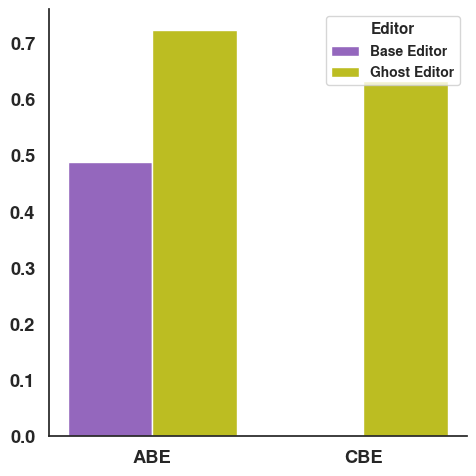

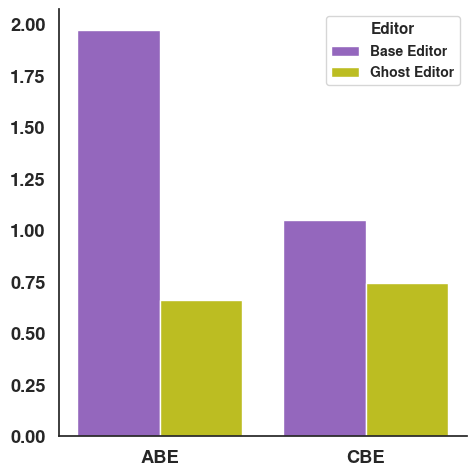

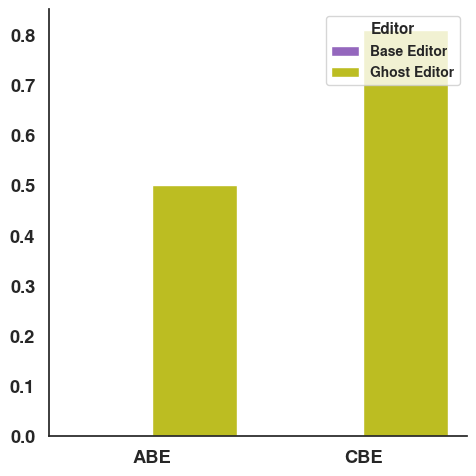

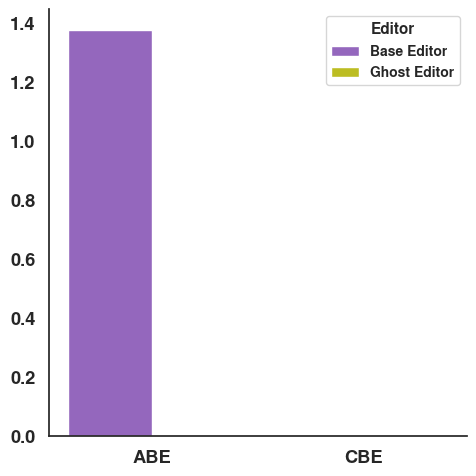

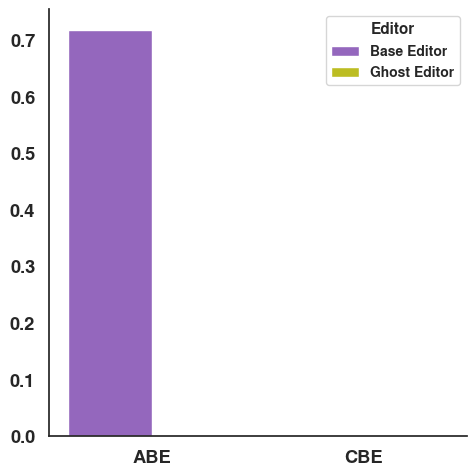

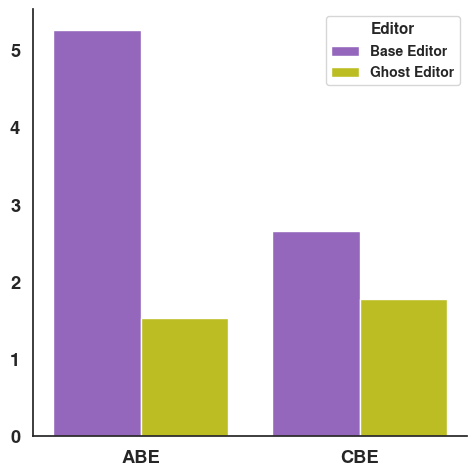

In [161]:
# Data
label = ['SYN', 'MIS','ETY','Control', 'Neutral','iSilence']
for categ in label:
    Library = ['ABE', 'CBE']
    Editor = ['Base Editor', 'Ghost Editor']
    df_ = df_hitn[df_hitn['categ'] == categ].reset_index()
    data = {
        'Library': Library,
        'Base Editor': [np.sqrt(df_.loc[0,'hit_perc']),np.sqrt(df_.loc[2,'hit_perc'])],
        'Ghost Editor': [np.sqrt(df_.loc[1,'hit_perc']), np.sqrt(df_.loc[3,'hit_perc'])]
    }

    # Arrange the data for a grouped bar chart
    x = np.arange(len(fruits))  # the label locations
    width = 0.4  # the width of the bars

    # Plotting
    fig, ax = plt.subplots(figsize=(5, 5))

    # Bars for each year
    base_editor_bars = ax.bar(x - width / 2, data['Base Editor'], width, label='Base Editor', color='tab:purple')
    ghost_editor_bars = ax.bar(x + width / 2, data['Ghost Editor'], width, label='Ghost Editor', color='tab:olive')

    # Add labels, title, and legend
    ax.set_xticks(x)
    ax.set_xticklabels(fruits)
    ax.legend(title='Editor', fontsize=10, title_fontsize=11,loc='upper right')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Show the plot
    plt.tight_layout()
    plt.savefig(join('Figures','bar', f'{categ}_bar.png'), transparent = True,bbox_inches='tight')

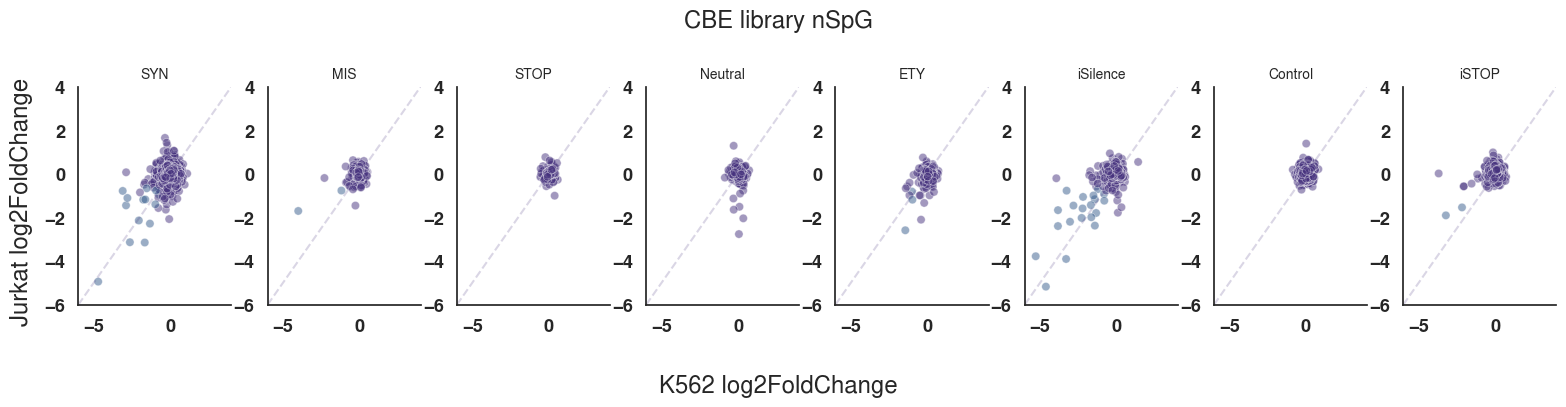

In [13]:
# Create scatter plot
list_categ = df['categ'].unique()
n_categ = len(list_categ)

fig, axes = plt.subplots(1,n_categ, figsize = (16,4))

for i,categ in enumerate(list_categ):
    df_ = df[df['categ'] == categ]
    sns.scatterplot(data = df_, x = 'log2FoldChange_K562', y = 'log2FoldChange_Jurkat',hue = 'significant', alpha = 0.5, ax = axes[i])
    axes[i].set_title(categ, fontsize = 10)
    # axes[i].text(0,-6, f'corr:{round(corr,2)}')
    axes[i].set_xlim([-6,4])
    axes[i].set_ylim([-6,4])
    axes[i].plot([0, 1], [0, 1], transform=axes[i].transAxes,ls='--', alpha = 0.2)
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].get_legend().remove()
    
fig.supxlabel('K562 log2FoldChange')
fig.supylabel('Jurkat log2FoldChange')
fig.suptitle('CBE library nSpG')
plt.tight_layout(w_pad = 0.1,h_pad = 0.1)

In [138]:
BE = 'CBE'
library = 'CBE'
thrd = 0.05
df = pd.read_csv(join(data_path, f'{library}_{BE}_cell_line_padj.csv'))

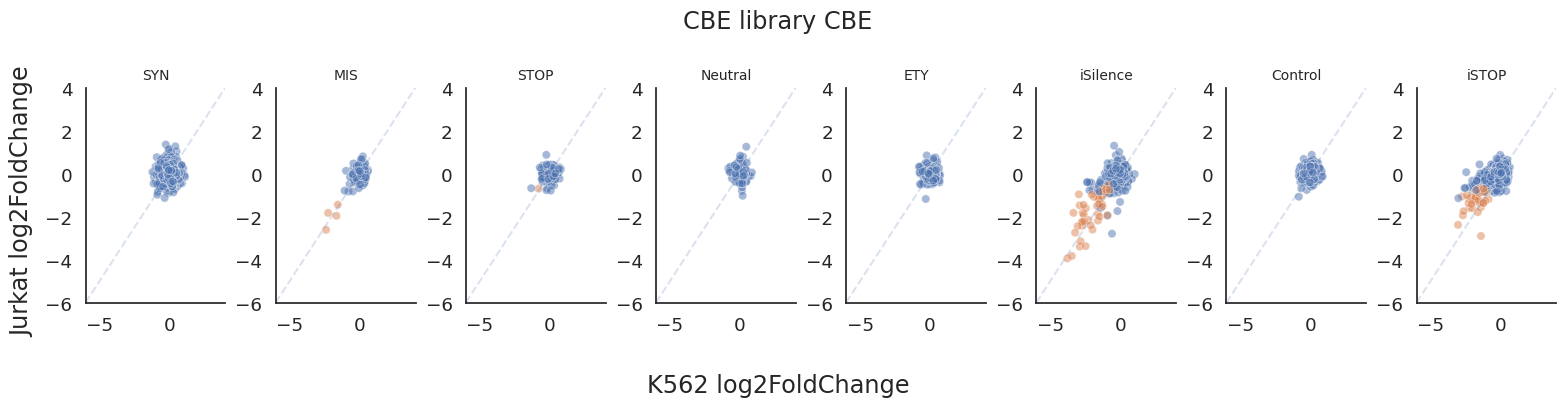

In [139]:
# Create scatter plot
list_categ = df['categ'].unique()
n_categ = len(list_categ)

fig, axes = plt.subplots(1,n_categ, figsize = (16,4))

for i,categ in enumerate(list_categ):
    df_ = df[df['categ'] == categ]
    sns.scatterplot(data = df_, x = 'log2FoldChange_K562', y = 'log2FoldChange_Jurkat',hue = 'significant', alpha = 0.5, ax = axes[i])
    axes[i].set_title(categ, fontsize = 10)
    # axes[i].text(0,-6, f'corr:{round(corr,2)}')
    axes[i].set_xlim([-6,4])
    axes[i].set_ylim([-6,4])
    axes[i].plot([0, 1], [0, 1], transform=axes[i].transAxes,ls='--', alpha = 0.2)
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].get_legend().remove()
    
fig.supxlabel('K562 log2FoldChange')
fig.supylabel('Jurkat log2FoldChange')
fig.suptitle('CBE library CBE')
plt.tight_layout(w_pad = 0.5,h_pad = 0.25)

In [159]:
list_categ = df['categ'].unique()

In [161]:
df = pd.read_csv(join(data_path,'nSpG_ABE_hitn.csv'), index_col = 0)

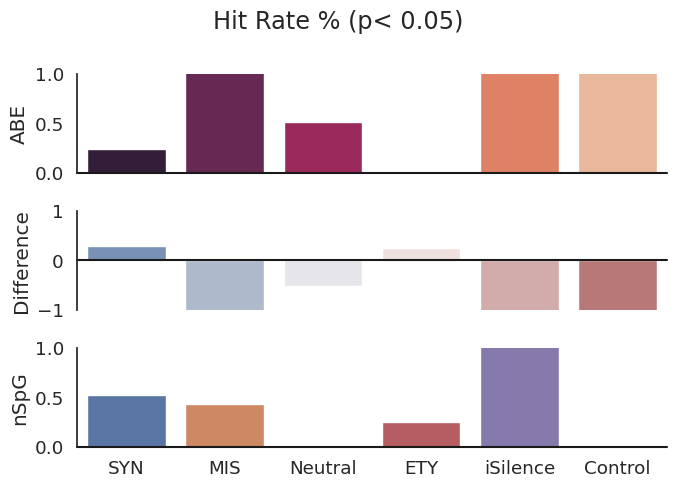

In [166]:
# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data
sns.barplot(data = df[df['library'] == 'ABE'], 
            x='categ', y='hit_perc', hue='categ', 
            palette="rocket",dodge = False, ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylim(0,1)
ax1.set_ylabel("ABE")
ax1.set_xlabel("")
ax1.get_legend().remove()

# Center the data to make it diverging
list_categ = df['categ'].unique()
diff = np.array(df[df['library'] == 'nSpG']['hit_perc'])-np.array(df[df['library'] == 'ABE']['hit_perc'])
sns.barplot(x=list_categ, y=diff, hue = list_categ, 
            palette="vlag", dodge = False, ax=ax2)
ax2.set_ylim(-1,1)

ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Difference")
ax2.get_legend().remove()

# Randomly reorder the data to make it qualitative
sns.barplot(data = df[df['library'] == 'nSpG'], 
            x='categ', y='hit_perc', hue='categ', 
            palette="deep", dodge = False, ax=ax3)
ax3.set_ylim(0,1)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("nSpG")
ax3.set_xlabel("")
ax3.get_legend().remove()

# Finalize the plot
sns.despine(bottom=True)
# f.supxlabel('sgRNA Category')
f.suptitle('Hit Rate % (p< 0.05)')
# plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=1)


In [92]:
df_C

,categ,hits_ABE,hits_nSpG,ovp,BE
0,SYN,0,14,0,CBE
1,MIS,4,2,0,CBE
2,STOP,1,0,0,CBE
3,Neutral,0,0,0,CBE
4,ETY,0,3,0,CBE
5,iSilence,45,20,8,CBE
6,Control,0,0,0,CBE
7,iSTOP,40,2,1,CBE


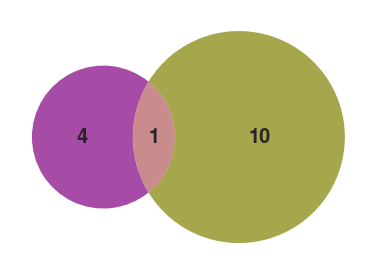

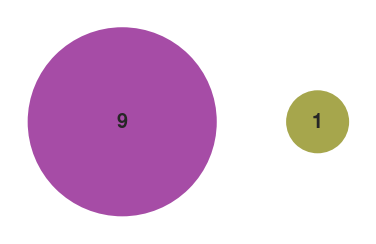

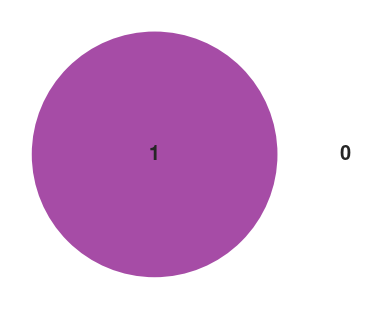

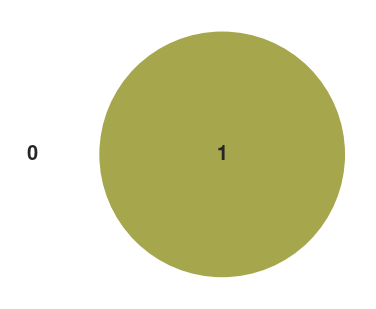

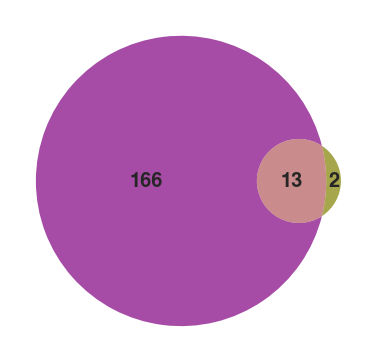

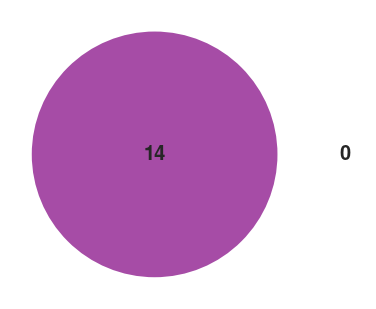

In [98]:
from matplotlib_venn import venn2

# Loop through each row and create a Venn diagram
for index, row in enumerate(zip(df_A['categ'], df_A['hits_ABE'], df_A['hits_nSpG'], df_A['ovp'])):
    categ, hits_ABE, hits_nSpG, ovp = row

    # Create the Venn diagram
    plt.figure(figsize=(4, 4))
    venn = venn2(subsets=(hits_ABE - ovp, hits_nSpG - ovp, ovp), 
                 set_labels = ('',''),
                 set_colors=('purple', 'olive'), alpha=0.7)
    
    # Remove title and adjust layout
    plt.tight_layout()
    plt.savefig(join('Figures','Venn', f'ABE_{categ}_venn.png'), transparent = True,bbox_inches='tight')
    plt.show()

In [86]:
df_C = pd.read_csv(join(data_path, 'CBE_nSpG_ovp.csv'), index_col = 0)
df_A = pd.read_csv(join(data_path, 'ABE_nSpG_ovp.csv'), index_col = 0)



In [87]:
pd.concat([df_A, df_C])

,categ,hits_ABE,hits_nSpG,ovp,BE
0,SYN,5,11,1,ABE
1,MIS,9,1,0,ABE
2,Neutral,1,0,0,ABE
3,ETY,0,1,0,ABE
4,iSilence,179,15,13,ABE
5,Control,14,0,0,ABE
0,SYN,0,14,0,CBE
1,MIS,4,2,0,CBE
2,STOP,1,0,0,CBE
3,Neutral,0,0,0,CBE


In [85]:
df

,categ,hits_ABE,hits_nSpG,ovp,BE
0,SYN,0,14,0,CBE
1,MIS,4,2,0,CBE
2,STOP,1,0,0,CBE
3,Neutral,0,0,0,CBE
4,ETY,0,3,0,CBE
5,iSilence,45,20,8,CBE
6,Control,0,0,0,CBE
7,iSTOP,40,2,1,CBE


Text(0.5, 1.0, 'ABE library nSpG number hit found in ABE')

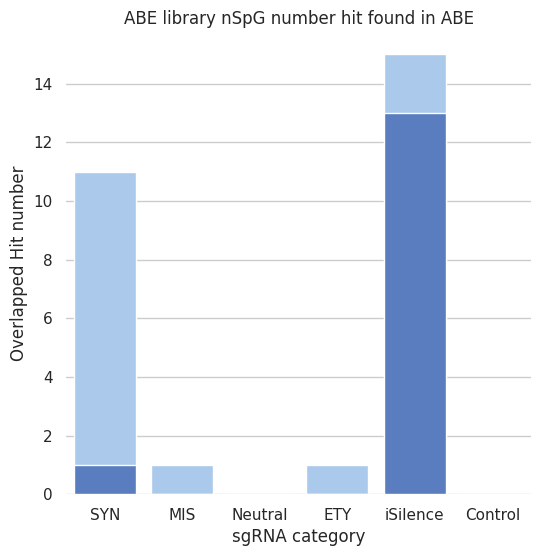

In [184]:
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(data = df, x='categ', y="hits_nSpG", 
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(data = df, x="categ", y="ovp", 
            label="Overlap", color="b")

# # Add a legend and informative axis label
# ax.legend(ncol=2, loc="lower right", frameon=True)
# ax.set(xlim=(0, 24), ylabel="",
#        xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)
ax.set_ylabel('Overlapped Hit number')
ax.set_xlabel('sgRNA category')
ax.set_title('ABE library nSpG number hit found in ABE')